In [19]:
# Dependencies
import tweepy
import json
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [20]:
# Twitter API Keys
consumer_key = '9JxCXW0dA4SU2tlkzJ65Irl4E'
consumer_secret = 'fuADIcafEm1GFLTns5pBJ2LyJ7MYKDIzOb0TjaF5dY5Ihfcc1s'
access_token = '51898764-ApC1RerXMpDt6FEGHgVkfbiaRehsWD2TpVlboEo51'
access_token_secret = 'WBKrjp1Zrp1bm44xRU1jH4QyFJHobp1EmyjrzTnRFFe6s'

In [21]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [22]:
#the tweets we want to pull from
news_outlet = ["BBCWorld", "CBS", "CNN", "FoxNews", "nytimes"]

In [23]:
# Variables for holding sentiments
twitter_df = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 100 tweets:
for news in news_outlet:
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(news, count=100, result_type="recent")

    # Loop through all tweets 
    for tweet in public_tweets:
        counter = 1
        
        text = tweet["text"]
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        tweets_ago = counter
        
        
        twitter_df.append({"New Outlet": (tweet['user']['name']),
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,})
        
        counter = counter + 1
        #print(twitter_df)
        

In [24]:
df_twitter = pd.DataFrame.from_dict(twitter_df)


In [25]:
bbc_df = df_twitter.loc[df_twitter["New Outlet"] == "BBC News (World)",:]
cbs_df = df_twitter.loc[df_twitter["New Outlet"] == "CBS",:]
cnn_df = df_twitter.loc[df_twitter["New Outlet"] == "CNN",:]
fox_df = df_twitter.loc[df_twitter["New Outlet"] == "Fox News",:]
nytimes_df = df_twitter.loc[df_twitter["New Outlet"] == "The New York Times",:]

In [26]:
x_axis = np.arange(100, 0, -1)
print(x_axis)



[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1]


In [27]:
bbc_comp = bbc_df["Compound"]
cbs_comp = cbs_df["Compound"]
cnn_comp = cnn_df["Compound"]
fox_comp = fox_df["Compound"]
nytimes_comp = nytimes_df["Compound"]

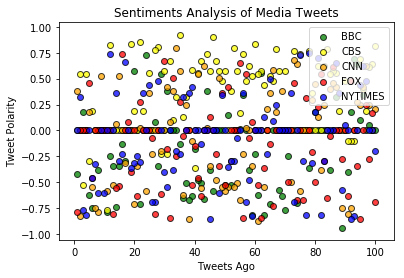

Text(0,0.5,'Tweet Polarity')

In [30]:
BBC_plot = plt.scatter(x_axis, bbc_comp, marker="o", facecolors="green", edgecolors="black", 
            alpha=0.75, label="BBC")

CBS_plot = plt.scatter(x_axis, cbs_comp, marker="o", facecolors="yellow", edgecolors="black", 
            alpha=0.75, label="CBS")

CNN_plot = plt.scatter(x_axis, cnn_comp, marker="o", facecolors="orange", edgecolors="black", 
            alpha=0.75, label="CNN")

Fox_plot = plt.scatter(x_axis, fox_comp, marker="o", facecolors="red", edgecolors="black", 
            alpha=0.75, label="FOX")

nyt_plot = plt.scatter(x_axis, nytimes_comp, marker="o", facecolors="blue", edgecolors="black", 
            alpha=0.75, label="NYTIMES")


plt.legend(loc="upper right")
plt.xticks([100, 80, 60, 40, 20, 0])

plt.savefig("Last hundred tweets scatter plot")

plt.show()

plt.title("Sentiments Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")



In [42]:
bbc_mean = (np.mean(bbc_comp))
cbs_mean = (np.mean(cbs_comp))
cnn_mean = (np.mean(cnn_comp))
fox_mean = (np.mean(fox_comp))
nytime_mean = (np.mean(nytimes_comp))

In [43]:
print(nytime_mean)

-0.075621


In [44]:
users = [bbc_mean, cbs_mean, cnn_mean, fox_mean, nytime_mean]
x_axis = np.arange(len(users))
print(len(x_axis))
print(users)

5
[-0.147266, 0.328515, -0.050477999999999995, -0.11781799999999996, -0.075621]


In [45]:
barlist = plt.bar(x_axis, users, color='r', alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "nytime"])

barlist[0].set_color('green')
barlist[1].set_color('yellow')
barlist[2].set_color('orange')
barlist[3].set_color('red')
barlist[4].set_color('blue')

In [46]:
plt.xlim(-0.25, len(x_axis))
plt.ylim(min(users)-.05, max(users)+.05)

(-0.197266, 0.378515)

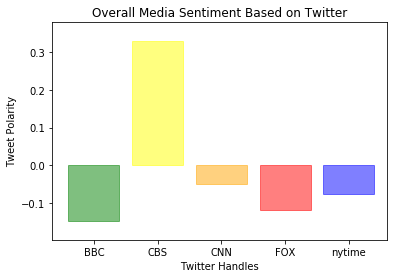

In [47]:
plt.title("Overall Media Sentiment Based on Twitter")
plt.xlabel("Twitter Handles")
plt.ylabel("Tweet Polarity")

plt.savefig("Media Sentiment")

plt.show()

